In [2]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import raybay

In [3]:
# Load treatment plan results
result = np.load('res_linear_quadratic_gp_minimize.pkl', allow_pickle=True)

In [4]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('res_linear_quadratic_gp_minimize.pkl', 'wb'))

In [5]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,ChestWall,MaxDvh,AtMost,3000,9.33
1,D2CM,MaxDose,AtMost,2400,NaN
2,Esophagus,MaxDvh,AtMost,1880,20.19
3,Lung_Total-GTV,MaxDvh,AtMost,1160,85.52
4,Lung_Total-GTV,MaxDvh,AtMost,1240,57.01
5,PTV,MinDvh,AtLeast,4800,95.00
6,PTV,MaxDose,AtMost,8000,NaN
7,Ribs,MaxDvh,AtMost,3200,1.51
8,Ribs,MaxDose,AtMost,4000,NaN
9,SpinalCanal,MaxDvh,AtMost,1360,3.25


In [6]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,ChestWall,MaxDvh,3000,9.33,NaN,1
1,D2CM,MaxDose,"[0,2400]",0.00,NaN,1
2,Esophagus,MaxDvh,1880,20.19,NaN,1
3,Lung_Total-GTV,MaxDvh,1160,85.52,NaN,1
4,Lung_Total-GTV,MaxDvh,1240,57.01,NaN,1
5,PTV,MinDvh,4800,95.00,NaN,1
6,PTV,MaxDose,8000,0.00,NaN,1
7,Ribs,MaxDvh,3200,1.51,NaN,1
8,Ribs,MaxDose,"[0,4000]",0.00,NaN,1
9,SpinalCanal,MaxDvh,1360,3.25,NaN,1


In [7]:
# Clinical goal results
compare = pd.DataFrame()
for index, row in result.goal_df.iterrows():
    roi = row['Roi']
    goal_type = row['Type']
    level = row['AcceptanceLevel']
    value = result.goal_dict[index][0]
    percent = 100*(value - level)/level
    compare = compare.append({'Roi': roi, 'Type': goal_type, 'AcceptanceLevel': level, 
                              'GoalValue': value, 'PercentChange': percent}, ignore_index=True)
compare = compare[['Roi', 'Type', 'AcceptanceLevel', 'GoalValue', 'PercentChange']] # enforce column order
compare

,Roi,Type,AcceptanceLevel,GoalValue,PercentChange
0,ChestWall,MaxDvh,3000.0,2333.366090,-22.221130
1,D2CM,MaxDose,2400.0,2872.955322,19.706472
2,Esophagus,MaxDvh,1880.0,296.285722,-84.240121
3,Lung_Total-GTV,MaxDvh,1160.0,14.698647,-98.732875
4,Lung_Total-GTV,MaxDvh,1240.0,83.507166,-93.265551
5,PTV,MinDvh,4800.0,4800.000317,0.000007
6,PTV,MaxDose,8000.0,5723.844238,-28.451947
7,Ribs,MaxDvh,3200.0,3785.125032,18.285157
8,Ribs,MaxDose,4000.0,4905.762207,22.644055
9,SpinalCanal,MaxDvh,1360.0,597.267020,-56.083307


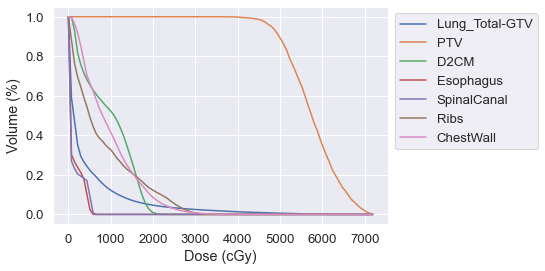

In [8]:
# Dose-volume histograms
result.dvhplot()

In [9]:
# Utility function values
lin = result.get_utility('linear')[0]
lin_quad = result.get_utility('linear_quadratic')[0]
print(f"Linear: {lin:.2f}, Linear-Quadratic: {lin_quad:.2f}")

Linear: 395.74, Linear-Quadratic: -839.70
